## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [1]:
#import data: 
#%cd C:\Users\Max\Desktop\PythonColumbiaClass\SummerPythonCourse\Assignment2

In [2]:
import pandas as pd
df=pd.read_csv("banklist.csv")
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [3]:
print(len(df))

555


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


## Question 1 (20 points)

In [5]:
#Look at the data set: First, make sure there are no missing values in
#any of the categorical columns.If there are, replace them with
#a 'M' value. 
#Then, consider that Acquiring Institution column is the institution that holds various banks.
#What are the top 4 acquiring institutions?

In [6]:
#Answer here
df.isnull().describe() #All columns have no NA values.

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
count,555,555,555,555,555,555,555
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,555,555,555,555,555,555,555


In [7]:
df['Acquiring Institution'].value_counts().iloc[:5]

No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: Acquiring Institution, dtype: int64

**Answer: 31 of the banks don't have an acquirer. So the top four acquiring institutions include State Bank and Trust Company, First-Citizens Bank & Trust Company, Ameris Bank, and U.S. Bank N.A..**

In [8]:
#How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [9]:
#Answer here

df['City'].str.startswith('A').value_counts()

False    521
True      34
Name: City, dtype: int64

**Answer: There are 34 city names start with A, and 521 names don't.**

In [10]:
#What are the cities whose names consist of 2 words and how many are there?

In [11]:
#Answer here
df['City'].str.split().apply(len).value_counts() #see the whole stats

1    417
2    130
3      8
Name: City, dtype: int64

In [12]:
df['City'].str.split().apply(len).value_counts()[2] #only get the number of names with 2 words.

130

**Answer: There are 130 names consist of 2 words, and 425 names don't.**

## Question 2 (50 points)

In [13]:
#Part A use various apply and group by methods studied in class to obtain the city for each 
#state corresponding to the smallest number of certificates (CERT column).

#Part B Then, display only the city, state combinations from above
#along with the number of certificates
#(data frame with 3 columns) for which the Acquiring Institution contains  3 words. For example,
# First NBC Bank
#(for this exercise, you can count symbols
#like & and others as words for each Acquiring Institution)


In [14]:
#Part A starts Here.

def count_cert(data): 
    idx = data['CERT'].idxmin() #find the min index of CERT
    city = data.loc[idx, ['City']] #get the City responding to that index
    return city

grouped=df.groupby('ST')[['City','CERT']].apply(count_cert)
grouped.head()

,City
ST,
AL,Montgomery
AR,Mulberry
AZ,Phoenix
CA,Merced
CO,Greeley


In [15]:
len(grouped) #make sure there are 44 rows.

44

In [16]:
#now, check to make sure it is correct for 2 of the items above: 
df.groupby(['ST','City'])['CERT'].min()[0:10]

ST  City        
AL  Birmingham      17750
    Fort Deposit    24957
    Irondale        32276
    Montgomery       9609
    Sylacauga       35224
AR  Batesville      58052
    Bentonville     33901
    Gravette        34248
    Mulberry           91
AZ  Flagstaff       34875
Name: CERT, dtype: int64

In [17]:
len_acq_inst=[x for x in df['Acquiring Institution'].str.split(" ")]
len_acq_inst[0:5]

[['Royal', 'Savings', 'Bank'],
 ['Conway', 'Bank'],
 ['United', 'Fidelity', 'Bank,', 'fsb'],
 ['First-Citizens', 'Bank', '&', 'Trust', 'Company'],
 ['Whitney', 'Bank']]

In [18]:
len(len_acq_inst)==len(df)

True

In [19]:
#now, append the length array to original data frame, and then merge with the above by 
# state and city: 

df['ail']=len_acq_inst
df2=df[['ST','City','ail']]
df2.head()

,ST,City,ail
0,IL,Chicago,"[Royal, Savings, Bank]"
1,KS,Argonia,"[Conway, Bank]"
2,IL,Saint Elmo,"[United, Fidelity, Bank,, fsb]"
3,WI,Milwaukee,"[First-Citizens, Bank, &, Trust, Company]"
4,LA,New Orleans,"[Whitney, Bank]"


In [20]:
# For this part review reset_index use inplace. 
# The grouped data has state as the index. SO you need to reindex grouped data before the merge.

grouped.reset_index(inplace=True)

In [21]:
#now you write the code to merge the data frames properly:
#your code goes here

merged = pd.merge(df2, grouped, on=['ST', 'City'])

In [22]:
merged.head()

,ST,City,ail
0,IL,Chicago,"[Royal, Savings, Bank]"
1,IL,Chicago,"[State, Bank, of, Texas]"
2,IL,Chicago,"[Republic, Bank, of, Chicago]"
3,IL,Chicago,"[United, Fidelity, Bank,, fsb]"
4,IL,Chicago,"[State, Bank, of, Texas]"


In [23]:
merged.info() #there are 73 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 3 columns):
ST      73 non-null object
City    73 non-null object
ail     73 non-null object
dtypes: object(3)
memory usage: 2.3+ KB


In [24]:
#Part B Answer here.
#remember the drop_duplicates() method when you write your code here

merged['ail'] = merged.ail.apply(lambda x: len(x))

In [25]:
final = merged[merged['ail']==3].drop_duplicates()

In [26]:
final

,ST,City,ail
0,IL,Chicago,3
24,SC,Fairfax,3
29,AZ,Phoenix,3
32,KY,Lexington,3
35,MO,Glasgow,3
38,MN,Forest Lake,3
40,IA,Johnston,3
42,IN,Evansville,3
43,CO,Greeley,3
45,WA,Burlington,3


In [27]:
len(final)

22

## Question 3 (30 points)

In [28]:
#Part A let us obtain a distribution of CERT column across all records.

# Part B Then, let us subset the original data frame to 
#only consider records for which CERT is smaller than 10th percentile of the total. 

# Part C. Then, for these records, use pivot table
# method to obtain the min, max, and average CERT for each ST combination for 
# which the number of records is more than 1. We will have index for 
#state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
# you do not have a multi-level data frame! 

#Part D display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, and the corresponding 3 summary 
# statistics will be the 3 bars - stacked Mean Cert ,Max Cert and Min Cert
#bar plot.

In [29]:
#Part A answer here
import numpy as np
df.CERT.describe(percentiles=np.arange(0,1,0.1))


count      555.000000
mean     31702.318919
std      16401.784351
min         91.000000
0%          91.000000
10%      10091.600000
20%      18217.800000
30.0%    22772.400000
40%      27325.000000
50%      32185.000000
60.0%    34266.400000
70%      35027.200000
80%      57105.400000
90%      57833.400000
max      58701.000000
Name: CERT, dtype: float64

In [31]:
#Part B answer here

ten_pct = df.CERT.describe(percentiles=np.arange(0,1,0.1)).loc['10%']
ten_pct

10091.6

In [32]:
subset = df.loc[df['CERT']<ten_pct,:]
subset.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,ail
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,"[United, Fidelity, Bank,, fsb]"
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17,"[Today's, Bank]"
11,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,6-Sep-16,"[The, Bank, of, Fayette, County]"
23,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16,"[State, Bank, of, Texas]"
24,NBRS Financial,Rising Sun,MD,4862,Howard Bank,17-Oct-14,19-Feb-18,"[Howard, Bank]"


In [41]:
# subset.loc[subset['ST'].value_counts()>1,:]
subset['ST'].value_counts().reset_index(name="count")

,index,count
0,IL,12
1,GA,7
2,KS,5
3,MO,4
4,OK,4
5,MN,3
6,TN,3
7,OH,2
8,UT,2
9,FL,2


In [123]:
## Part C. Then, for these records, use pivot table method
# to obtain the min, max, and average CERT for each ST combination for 
# which the number of records is more than 1. We will have index for 
# state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
# you do not have a multi-level data frame! 

# Answer.here

table = subset.pivot_table(index='ST',values='CERT', aggfunc=[np.min, np.max, np.mean])
table.reset_index(inplace=True)
table.columns = ['ST', 'min_CERT', 'max_CERT', 'mean_CERT']
table

,ST,min_CERT,max_CERT,mean_CERT
0,AL,9609,9609,9609.000000
1,AR,91,91,91.000000
2,CO,2994,2994,2994.000000
3,FL,5672,9619,7645.500000
4,GA,151,10054,4625.857143
5,IL,916,10086,5583.750000
6,IN,4392,4392,4392.000000
7,KS,1361,4754,4040.800000
8,MD,4862,4862,4862.000000
9,MI,1006,1006,1006.000000


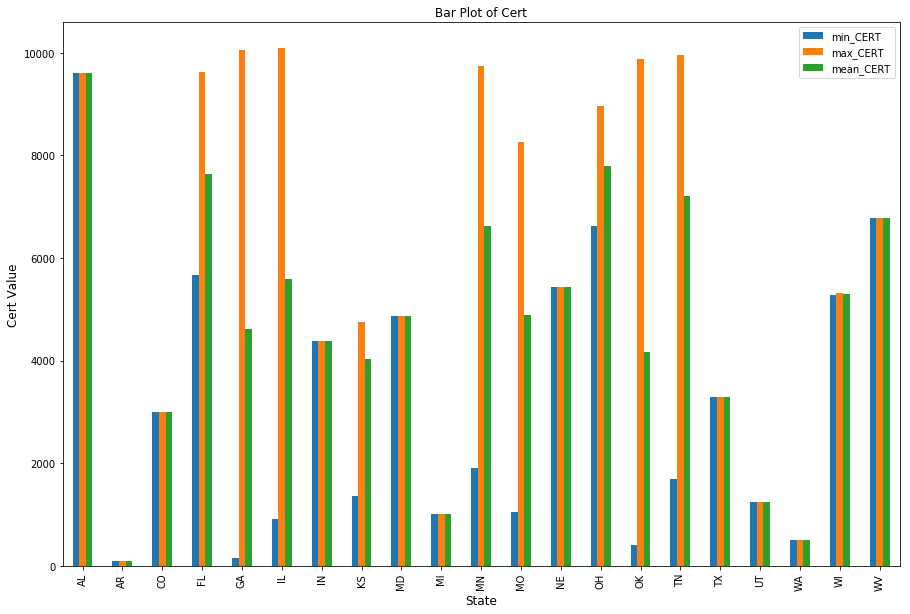

In [129]:
#Part D display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, and the corresponding 3 summary 
#statistics will be the 3 bars - stacked Mean Cert ,Max Cert and Min Cert
#bar plot.

import matplotlib.pyplot as plt
cert_plt = table.plot(x='ST', y=['min_CERT', 'max_CERT', 'mean_CERT'], 
                      kind='bar', 
                      figsize=(15, 10),
                      title='Bar Plot of Cert')
cert_plt.set_xlabel("State", fontsize=12)
cert_plt.set_ylabel("Cert Value", fontsize=12)
plt.show()

## End of Exam